__[Datenquelle](https://www.kaggle.com/datasets/jessemostipak/volcano-eruptions?resource=download)__ 

# Vulkane der Welt

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from sklearn import 
# from scipy.stats import randint

In [2]:
volcan = pd.read_csv('volcano.csv')
print(volcan.head())

   volcano_number     volcano_name primary_volcano_type last_eruption_year  \
0          283001              Abu            Shield(s)              -6850   
1          355096       Acamarachi        Stratovolcano            Unknown   
2          342080       Acatenango    Stratovolcano(es)               1972   
3          213004  Acigol-Nevsehir              Caldera              -2080   
4          321040            Adams        Stratovolcano                950   

         country                          region  \
0          Japan         Japan, Taiwan, Marianas   
1          Chile                   South America   
2      Guatemala      México and Central America   
3         Turkey  Mediterranean and Western Asia   
4  United States          Canada and Western USA   

                               subregion  latitude  longitude  elevation  ...  \
0                                 Honshu    34.500    131.600        641  ...   
1  Northern Chile, Bolivia and Argentina   -23.292    -6

In [3]:
print(volcan.dtypes)

volcano_number                int64
volcano_name                 object
primary_volcano_type         object
last_eruption_year           object
country                      object
region                       object
subregion                    object
latitude                    float64
longitude                   float64
elevation                     int64
tectonic_settings            object
evidence_category            object
major_rock_1                 object
major_rock_2                 object
major_rock_3                 object
major_rock_4                 object
major_rock_5                 object
minor_rock_1                 object
minor_rock_2                 object
minor_rock_3                 object
minor_rock_4                 object
minor_rock_5                 object
population_within_5_km        int64
population_within_10_km       int64
population_within_30_km       int64
population_within_100_km      int64
dtype: object


In [4]:
volcan.describe(include = 'all')

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
count,958.000000,958,958,958,958,958,958,958.000000,958.000000,958.000000,...,958,958,958,958,958,958,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02
unique,NaN,954,26,342,89,19,98,NaN,NaN,NaN,...,11,11,11,9,3,1,NaN,NaN,NaN,NaN
top,NaN,"Azul, Cerro",Stratovolcano,Unknown,United States,South America,Kamchatka Peninsula,NaN,NaN,NaN,...,,,,,,,NaN,NaN,NaN,NaN
freq,NaN,2,353,301,99,117,60,NaN,NaN,NaN,...,917,734,871,930,956,958,NaN,NaN,NaN,NaN
mean,298585.325678,NaN,NaN,NaN,NaN,NaN,NaN,14.984680,23.537475,1867.027140,...,NaN,NaN,NaN,NaN,NaN,NaN,4.786046e+04,6.121775e+04,3.040444e+05,2.730174e+06
std,49792.657247,NaN,NaN,NaN,NaN,NaN,NaN,31.584983,109.852596,1401.545901,...,NaN,NaN,NaN,NaN,NaN,NaN,2.986690e+05,3.023860e+05,7.354221e+05,5.690981e+06
min,210010.000000,NaN,NaN,NaN,NaN,NaN,NaN,-78.500000,-179.970000,-2500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,263025.000000,NaN,NaN,NaN,NaN,NaN,NaN,-5.401500,-78.282750,881.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.325000e+01,4.080000e+02,1.139775e+04
50%,300055.500000,NaN,NaN,NaN,NaN,NaN,NaN,14.514000,36.393500,1622.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.950000e+02,1.633500e+03,1.391800e+04,3.546460e+05
75%,343088.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.798250,131.045500,2548.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.642000e+03,2.073025e+04,2.565210e+05,2.981102e+06


<div class="alert alert-block alert-warning"><b>Note: </b> Negative latitudes (Breitengrade) repräsentieren die südliche Hemisphere, und negative longitudes (Längengrade) repräsentieren die westliche Hemisphere.
</div>

In [5]:
# wie viele Vulkane sind auf der Nordhalbkugel - wie viele auf der Südhalbkugel
volcano_north = (volcan['latitude'] >= 0).sum()
volcano_south = (volcan['latitude'] <= 0).sum()
print(volcano_north)
print(volcano_south)

655
303


In [6]:
# wie viele Vulkane sind auf der Westhalbkugel - wie viele auf der Osthalbkugel
volcano_east = (volcan['longitude'] >= 0).sum()
volcano_west = (volcan['longitude'] <= 0).sum()
print(volcano_east)
print(volcano_west)
print([volcan['latitude'][0] , volcan['longitude'][0] ])

542
416
[34.5, 131.6]


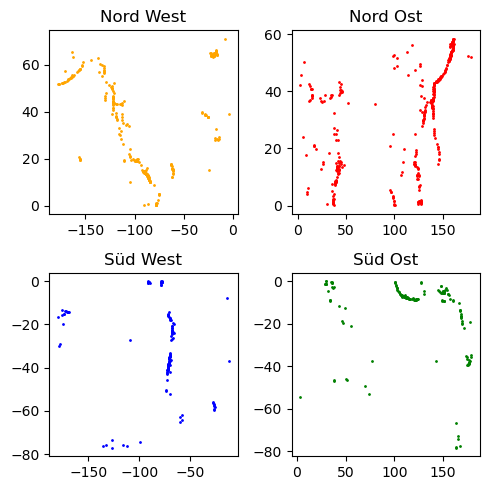

In [7]:
# Erstellen der Daten für die vier Quadranten
nord_ost = [] # x > 0 & y > 0
nord_west = [] # x < 0 & y > 0
sued_west = [] # x < 0 & y < 0
sued_ost = [] # x > 0 & y < 0

# Zusammenfügen der Datenpaare
coordinates = []
for index, row in volcan.iterrows():
    coordinates.append([row['latitude'], row['longitude']])

# Konvertieren in ein NumPy-Array
coordinates = np.array(coordinates)

# Teilen der Koordinatenpaare in Quadranten
nord_ost = coordinates[(coordinates[:, 0] > 0) & (coordinates[:, 1] > 0)]
sued_ost = coordinates[(coordinates[:, 0] < 0) & (coordinates[:, 1] > 0)]
sued_west = coordinates[(coordinates[:, 0] < 0) & (coordinates[:, 1] < 0)]
nord_west = coordinates[(coordinates[:, 0] > 0) & (coordinates[:, 1] < 0)]

# Plotten der Koordinatenpaare in den entsprechenden Quadranten
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0, 1].scatter(nord_ost[:, 1], nord_ost[:, 0], color='red', s=1)
axs[0, 1].set_title('Nord Ost')

axs[1, 0].scatter(sued_west[:, 1], sued_west[:, 0], color='blue', s=1)
axs[1, 0].set_title('Süd West')

axs[1, 1].scatter(sued_ost[:, 1], sued_ost[:, 0], color='green', s=1)
axs[1, 1].set_title('Süd Ost')

axs[0, 0].scatter(nord_west[:, 1], nord_west[:, 0], color='orange', s=1)
axs[0, 0].set_title('Nord West')

plt.tight_layout()
plt.show()

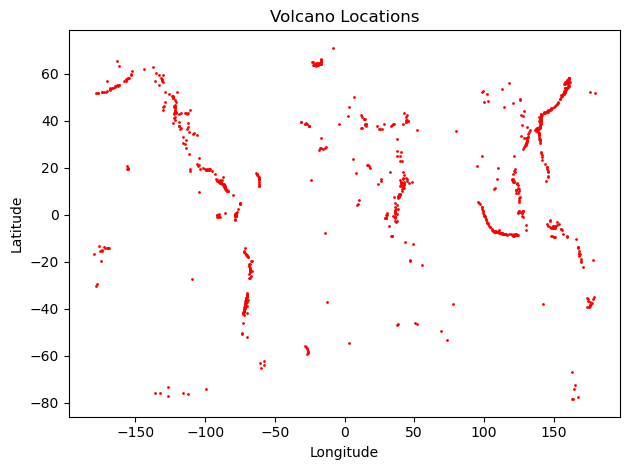

In [8]:
# Zusammenfügen der Datenpaare
coordinates = []
for index, row in volcan.iterrows():
    coordinates.append([row['latitude'], row['longitude']])

# Konvertieren in ein NumPy-Array
coordinates = np.array(coordinates)
plt.scatter(coordinates[:, 1], coordinates[:, 0], color='red', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Volcano Locations')

plt.tight_layout()
plt.show()

In [9]:
print(volcan['major_rock_1'].unique())
print(volcan['major_rock_1'].nunique())

['Andesite / Basaltic Andesite' 'Dacite' 'Rhyolite'
 'Basalt / Picro-Basalt' 'Trachyte / Trachydacite'
 'Phono-tephrite /  Tephri-phonolite'
 'Trachyandesite / Basaltic Trachyandesite'
 'Trachybasalt / Tephrite Basanite' 'Foidite' 'Phonolite']
10


In [10]:
print(volcan.primary_volcano_type.unique())
print(volcan.primary_volcano_type.nunique())

['Shield(s)' 'Stratovolcano' 'Stratovolcano(es)' 'Caldera' 'Submarine'
 'Shield' 'Volcanic field' 'Fissure vent(s)' 'Compound' 'Complex'
 'Pyroclastic shield' 'Pyroclastic cone(s)' 'Pyroclastic cone'
 'Caldera(s)' 'Lava dome(s)' 'Lava cone' 'Crater rows' 'Maar(s)'
 'Tuff cone(s)' 'Complex(es)' 'Subglacial' 'Lava dome' 'Lava cone(s)'
 'Tuff cone' 'Lava cone(es)' 'Stratovolcano?']
26


In [11]:
volcan['primary_volcano_type'] = volcan['primary_volcano_type'].replace('Lava cone(es)', 'Lava cone(s)')
print(volcan.primary_volcano_type.unique())
print(volcan.primary_volcano_type.nunique())

['Shield(s)' 'Stratovolcano' 'Stratovolcano(es)' 'Caldera' 'Submarine'
 'Shield' 'Volcanic field' 'Fissure vent(s)' 'Compound' 'Complex'
 'Pyroclastic shield' 'Pyroclastic cone(s)' 'Pyroclastic cone'
 'Caldera(s)' 'Lava dome(s)' 'Lava cone' 'Crater rows' 'Maar(s)'
 'Tuff cone(s)' 'Complex(es)' 'Subglacial' 'Lava dome' 'Lava cone(s)'
 'Tuff cone' 'Stratovolcano?']
25
